## Feature Ablation: No Study Hours

**Objective**:  
To test how the performance of regression models changes when the most impactful feature (`study_hours_per_day`) is removed. This helps understand model reliance and generalizability.


## 🔄 Workflow

### 1. Dataset Prep
- Load the cleaned dataset.
- Drop study_hours_per_day.

In [13]:
import pandas as pd

df_clean = pd.read_csv('cleaned_exam_data.csv')
df_ablation = df_clean.drop(['study_hours_per_day'], axis=1)
df_ablation

,age,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,extracurricular_participation,exam_score,diet_quality_encoded,internet_quality_encoded
0,1.084551,-1.114064,-0.669750,0,0.092426,1.248120,1.461166,0.900186,1,56.2,1,1
1,-0.215870,0.251315,0.446965,0,1.401696,-1.525661,1.461166,0.900186,0,100.0,2,1
2,0.217604,0.507324,-0.483631,0,1.135584,1.248120,-1.008689,-1.559339,0,34.3,0,0
3,1.084551,1.190013,-0.762810,0,-1.397800,2.227102,0.473224,-1.559339,1,26.8,0,2
4,-0.649344,1.616694,-1.228108,0,0.720450,-1.280916,-0.020747,-1.559339,0,66.4,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.217604,-1.711417,-0.204452,0,-0.759132,0.840211,-0.514718,0.197465,1,76.1,1,2
996,-1.516291,-1.284736,0.540025,1,0.198871,0.269138,-1.008689,0.197465,1,65.9,0,1
997,-0.215870,0.080643,-0.483631,0,-2.366448,0.024393,0.967195,1.251547,1,64.4,2,2
998,1.518025,1.360685,-0.669750,1,1.689097,0.921793,-1.502660,-1.559339,0,69.7,1,1


In [17]:
df_ablation.columns[df_ablation.isnull().any()]

Index([], dtype='object')

### 2. Model Training – Train the Following Regression Models:

- **Multiple Linear Regression**
- **Random Forest Regressor**
- **XGBoost Regressor**


### Multiple Linear Regression

In [20]:
# X = all columns except exam_score
X = df_ablation.drop('exam_score', axis=1)

# y = exam_score (target)
y = df_ablation['exam_score']


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = model.predict(X_test)


In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np  

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE on Test Set: {mae:.2f}")
print(f"MSE on Test Set: {mse:.2f}")
print(f"RMSE on Test Set: {rmse:.2f}")
print(f"R² Score on Test Set: {r2:.2f}")


MAE on Test Set: 11.51
MSE on Test Set: 217.69
RMSE on Test Set: 14.75
R² Score on Test Set: 0.15


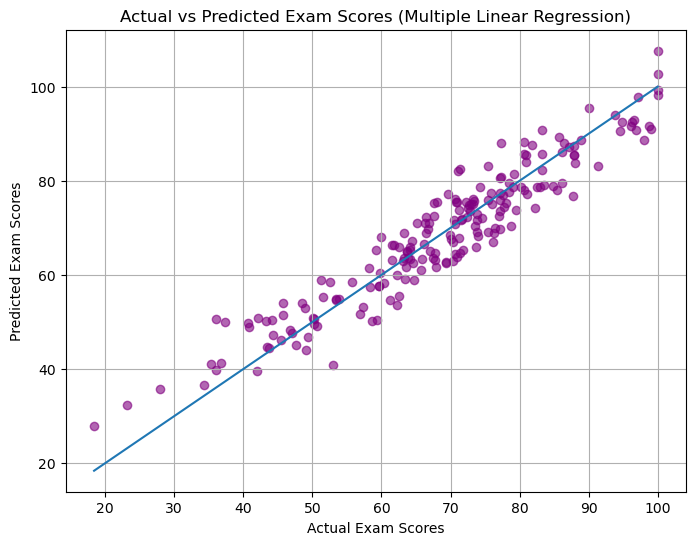

In [175]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='purple', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])  
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.title('Actual vs Predicted Exam Scores (Multiple Linear Regression)')
plt.grid(True)
plt.show()


### Random Forest


In [38]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=600,     # More trees
    max_depth=None,       # Let it grow deeper
    min_samples_split=5,  # Reduce overfitting
    random_state=42
)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"MAE on Test Set: {mae_rf:.2f}")
print(f"MSE on Test Set: {mse_rf:.2f}")
print(f"RMSE on Test Set: {rmse_rf:.2f}")
print(f"R² Score on Test Set: {r2_rf:.2f}")


MAE on Test Set: 12.27
MSE on Test Set: 241.00
RMSE on Test Set: 15.52
R² Score on Test Set: 0.06


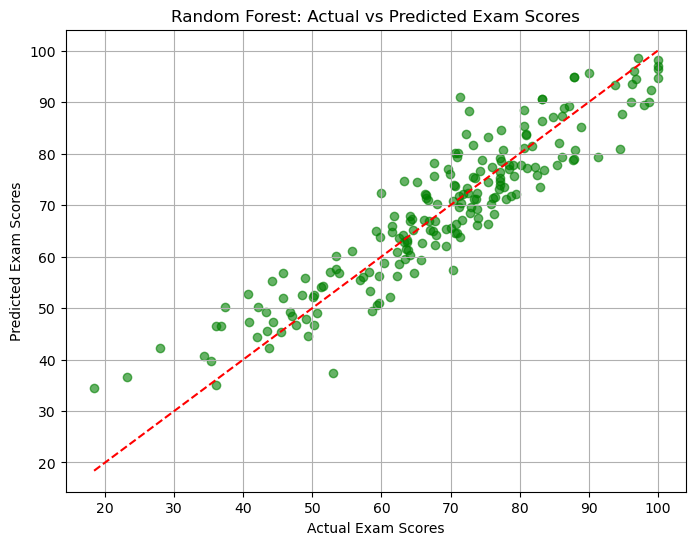

In [182]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.title('Random Forest: Actual vs Predicted Exam Scores')
plt.grid(True)
plt.show()


In [40]:
import pandas as pd

# Create a DataFrame with features and their coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

# Display it
print(coef_df)


                          Feature  Coefficient
7            mental_health_rating     5.669197
6              exercise_frequency     2.516264
5                     sleep_hours     1.812925
4           attendance_percentage     1.723674
0                             age     0.516958
9            diet_quality_encoded     0.455358
10       internet_quality_encoded     0.094891
3                   part_time_job    -0.712605
8   extracurricular_participation    -1.041295
2                   netflix_hours    -2.615395
1              social_media_hours    -3.348334


### XGBoost Regressor

In [42]:
!pip install xgboost

from xgboost import XGBRegressor
from sklearn.metrics import r2_score, root_mean_squared_error


In [44]:
X = df_ablation.drop('exam_score', axis=1)
y = df_ablation['exam_score']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [46]:
xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [50]:
y_pred_xgb = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"MAE on Test Set (XGBoost): {mae_xgb:.2f}")
print(f"MSE on Test Set (XGBoost): {mse_xgb:.2f}")
print(f"RMSE on Test Set (XGBoost): {rmse_xgb:.2f}")
print(f"R² Score on Test Set (XGBoost): {r2_xgb:.2f}")


MAE on Test Set (XGBoost): 12.51
MSE on Test Set (XGBoost): 252.45
RMSE on Test Set (XGBoost): 15.89
R² Score on Test Set (XGBoost): 0.02


In [52]:
pip install graphviz


Note: you may need to restart the kernel to use updated packages.


<Figure size 1000x600 with 0 Axes>

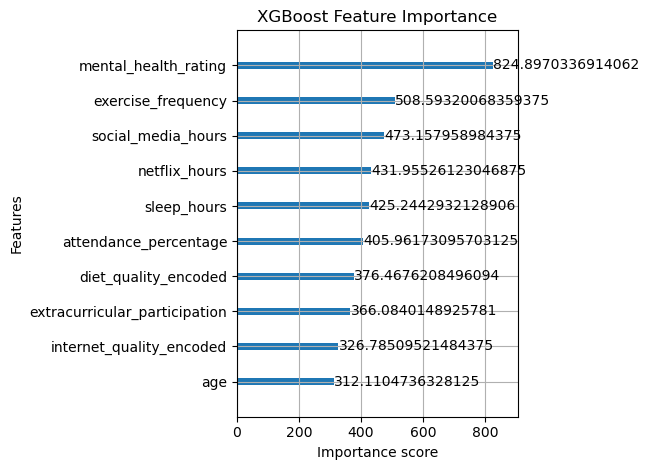

In [54]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plot_importance(xgb_model, max_num_features=10, importance_type='gain')  # or 'weight', 'cover'
plt.title("XGBoost Feature Importance")
plt.grid(True)
plt.tight_layout()
plt.show()


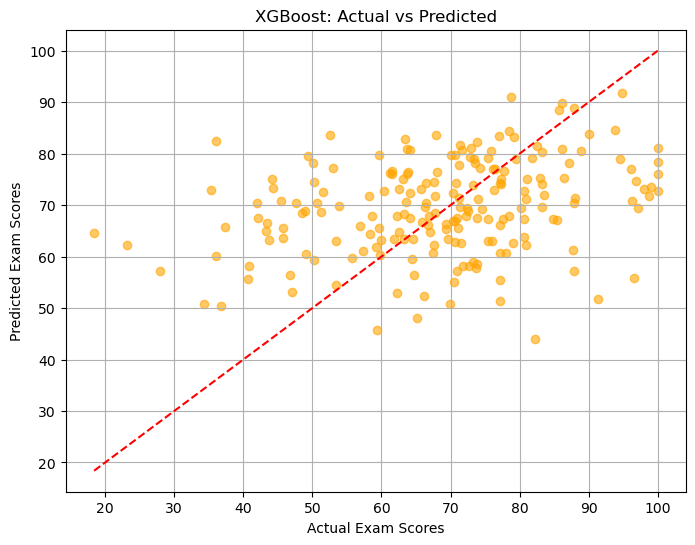

In [56]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, color='orange', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("XGBoost: Actual vs Predicted")
plt.grid(True)
plt.show()


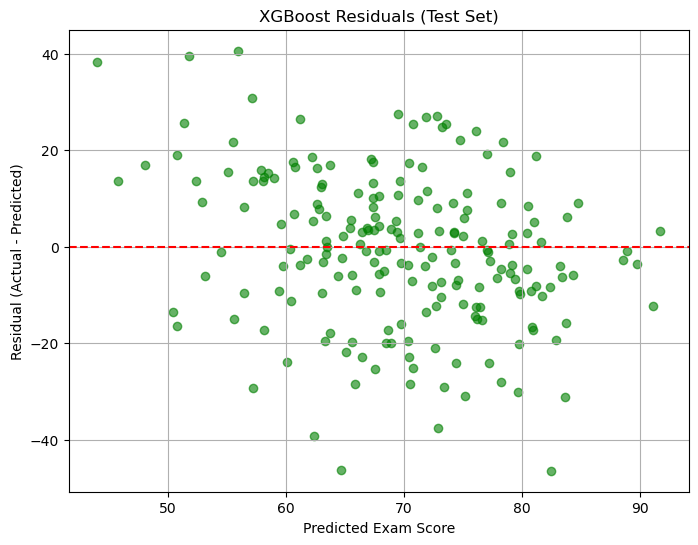

In [58]:
residuals_xgb = y_test - y_pred_xgb

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_xgb, residuals_xgb, color='green', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Exam Score')
plt.ylabel('Residual (Actual - Predicted)')
plt.title('XGBoost Residuals (Test Set)')
plt.grid(True)
plt.show()


In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X is your features (without exam_score)



X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Evaluation
print("🔵 Ridge Regression")
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("R²:", r2_score(y_test, y_pred_ridge))



🔵 Ridge Regression
MAE: 11.513341363733709
MSE: 217.65937713648344
RMSE: 14.75328360523458
R²: 0.1511907949147726


In [76]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Evaluation
print("🟣 Lasso Regression")
print("MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("R²:", r2_score(y_test, y_pred_lasso))


🟣 Lasso Regression
MAE: 11.480308283601072
MSE: 216.60852360362648
RMSE: 14.71762628971216
R²: 0.15528882259278998


---

| Metric       | Meaning                                                                                         | Ideal Value                                  |
| ------------ | ----------------------------------------------------------------------------------------------- | -------------------------------------------- |
| **MAE**      | Mean Absolute Error — average absolute difference between prediction and actual.                | Closer to **0** is better.                   |
| **MSE**      | Mean Squared Error — penalizes larger errors more (squares each error).                         | Lower is better.                             |
| **RMSE**     | Root Mean Squared Error — easier to interpret since it's in original units.                     | Lower is better.                             |
| **R² Score** | Coefficient of Determination — tells how much variance in exam score is explained by the model. | Closer to **1** is better (perfect fit = 1). |

---


#### 🔵 **Ridge Regression**

* **MAE:** `11.51` → On average, predictions are off by **\~11.5 points**.
* **RMSE:** `14.75` → A typical prediction error is about **14.75 points**.
* **R²:** `0.15` → Only **15%** of the variance in exam scores is explained by the model → **weak performance**.

#### 🟣 **Lasso Regression**

* **MAE:** `11.48` → Slightly better than Ridge, but still \~11.5 points off.
* **RMSE:** `14.71` → Also a bit better than Ridge.
* **R²:** `0.16` → Explains only **\~16%** of the score variance.

---

### What This Means

Removing `study_hours_per_day` significantly weakened the model:

* In the original model (Multiple Linear Regression **with** study hours), your **R² was 0.90** and **RMSE was \~5.1**.
* Now it's **R² = 0.15** and **RMSE = \~14.7**, showing **a big drop in performance**.

Conclusion:
`study_hours_per_day` is **critical** for accurate predictions. Without it, even regularized models (Ridge/Lasso) struggle.




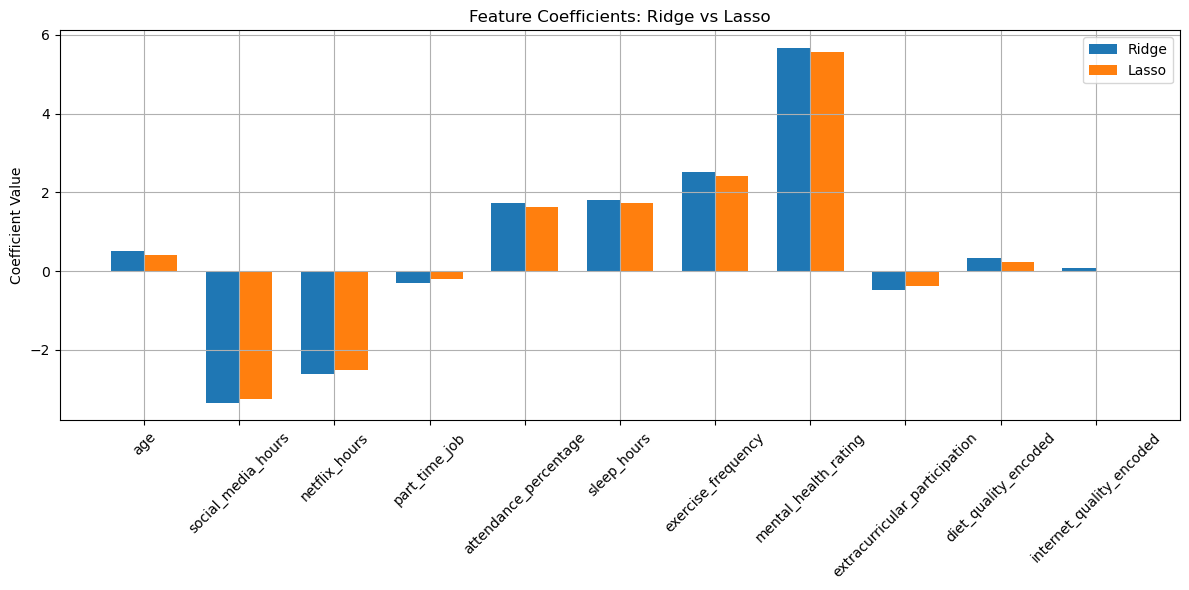

In [82]:
feature_names = X.columns

ridge_coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Ridge Coefficient': ridge_model.coef_
})

lasso_coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Lasso Coefficient': lasso_model.coef_
})

# Merge for side-by-side comparison
coef_compare = pd.merge(ridge_coef_df, lasso_coef_df, on='Feature')

import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(coef_compare))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, coef_compare['Ridge Coefficient'], width, label='Ridge')
plt.bar(x + width/2, coef_compare['Lasso Coefficient'], width, label='Lasso')

plt.xticks(x, coef_compare['Feature'], rotation=45)
plt.ylabel("Coefficient Value")
plt.title("Feature Coefficients: Ridge vs Lasso")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
